In [8]:
# Built-in libraries
from datetime import datetime
import random
import math

# Third-party libraries
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator
from statsmodels.stats.power import TTestIndPower, tt_ind_solve_power
from statsmodels.stats.weightstats import ttest_ind
from statsmodels.stats.proportion import proportions_chisquare, confint_proportions_2indep


# Disable warnings
from warnings import filterwarnings
filterwarnings('ignore')

# Set seed for np random
SEED = 123
np.random.seed(SEED)

In [9]:
df = pd.read_csv("pretest.csv",sep=',')

<h1><center>EDA</center></h1>


In [10]:
df.head()

,visitor_id,date,email,experiment,group,submitted
0,1,2021-12-01,NaN,NaN,NaN,0
1,2,2021-12-01,NaN,NaN,NaN,0
2,3,2021-12-01,NaN,NaN,NaN,0
3,4,2021-12-01,NaN,NaN,NaN,0
4,5,2021-12-01,NaN,NaN,NaN,0


In [11]:
print("Number of Rows:", df.shape[0])
print("Date Range:", df.date.min(), "-" , df.date.max())

Number of Rows: 309903
Date Range: 2021-12-01 - 2021-12-31


In [12]:
#Null Rate per Column
df.isnull().mean()

visitor_id    0.000000
date          0.000000
email         0.899017
experiment    0.903070
group         0.903070
submitted     0.000000
dtype: float64

In [13]:
print("Total visitor count:", df["visitor_id"].nunique())
print("Sign-up Count:", df['submitted'].sum())
print("Sign-up Rate:",df['submitted'].mean().round(2))

Total visitor count: 309903
Sign-up Count: 31295
Sign-up Rate: 0.1


Text(0.5, 0, 'Date')

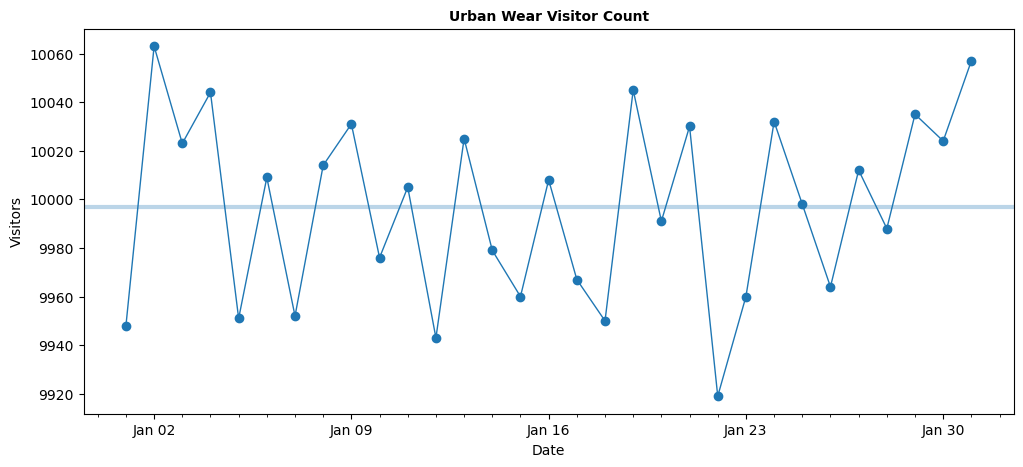

In [14]:
colors = sns.color_palette()
c1, c2 = colors[0], colors[1]

visits_per_day = df.groupby('date').submitted.count()
visits_mean = visits_per_day.mean()

# Plot the Data
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(visits_per_day.index, visits_per_day, '-o', color=c1, linewidth=1, label="Visits")
ax.axhline(visits_mean, color=c1, linestyle='-', linewidth=3, alpha=0.3, label="Visits (Mean)")

ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.xaxis.set_minor_locator(mdates.DayLocator())

ax.set_title('Urban Wear Visitor Count', fontsize=10, weight="bold")
ax.set_ylabel('Visitors', fontsize=10)
ax.set_xlabel('Date', fontsize=10)

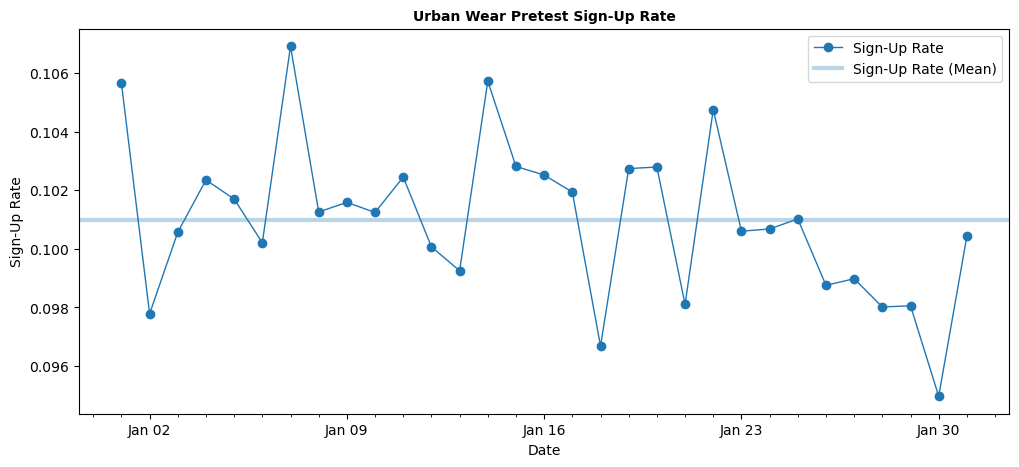

In [17]:
# Get the submission rate per date
signup_rate_per_day = df.groupby('date')['submitted'].mean() 
signup_rate_mean = signup_rate_per_day.mean() 

# Plot data
f, ax = plt.subplots(figsize=(12, 5))
plt.plot(signup_rate_per_day.index, signup_rate_per_day, '-o', color=c1, linewidth=1, label='Sign-Up Rate')
plt.axhline(signup_rate_mean, color=c1, linestyle='-', linewidth=3, alpha=0.3, label='Sign-Up Rate (Mean)')

# Format plot
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))
ax.xaxis.set_minor_locator(mdates.DayLocator())
plt.title('Urban Wear Pretest Sign-Up Rate', fontsize=10, weight='bold')
plt.ylabel('Sign-Up Rate', fontsize=10)
plt.xlabel('Date', fontsize=10)
plt.legend()
plt.show()

<h1><center> STATE THE HYPOTHESIS</center></h1>
 
The second step of the experiment is to state the hypothesis. This is followed by setting parameter values such as significance level (alpha), statistical power and minimum detectable effect (MDE)

**Ho**: The sign up rates of blue and green buttons are the same

**Ha**: The sign up rates of blue and green buttons are different

In [15]:
#Experiment Parameters
alpha = 0.05
power = 0.8
mde = 0.1


#Propportions if the effect exists
p1 = 0.1 #Control (Blue)
p2 = p1*(1+p1) #Treatment (Green)


<h1><center> SAMPLE SIZE CALCULATION</center></h1>


To detect an effect of 10.0% lift from the pretest sign-up at 10%, the sample size per group required is 15000.
The total sample required in the experiment is 30000.


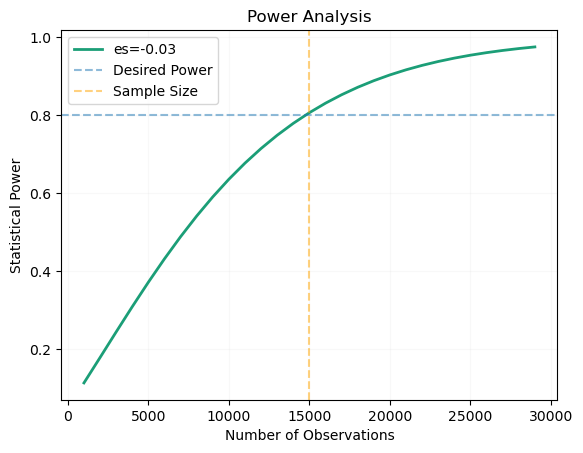

In [16]:
# Calculate the effect size using Cohen's D
cohen_D = sm.stats.proportion_effectsize(p1, p2)

# Estimate the sample size required per group
n = tt_ind_solve_power(effect_size=cohen_D, power=power, alpha=alpha)
n = int(round(n, -3)) # Round up to the nearest thousand

print(f'To detect an effect of {100*(p2/p1-1):.1f}% lift from the pretest sign-up at {100*p1:.0f}%, '
      f'the sample size per group required is {n}.'
      f'\nThe total sample required in the experiment is {2*n}.')

# Explore power across sample sizes
ttest_power = TTestIndPower()
ttest_power.plot_power(dep_var='nobs', nobs=np.arange(1000,30000,1000), effect_size=[cohen_D], title='Power Analysis')

# Set plot parameters
plt.axhline(0.8, linestyle='--', label='Desired Power', alpha=0.5)
plt.axvline(n, linestyle='--', color='orange', label='Sample Size', alpha=0.5)
plt.ylabel('Statistical Power')
plt.grid(alpha=0.08)
plt.legend()
plt.show()